# Hyperuniformity Analysis Workflow PlayGround
This is the notebook for test and experiment functions behavior that belong the Hyperuniformity Analysis workflow

## Highlight Ring in 2D Domain
This code should be able to consider a subset of the 2D domain that fall within a ring.

> The ring is defined by area between two circles that share same center

$
\begin{equation}
    \text{ring}= \{\text{point} \in \text{domain} : r_1 < \text{Distance(center, point)} < r_2\}
\end{equation}
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftfreq, fftshift

In [2]:
N = 512
L = 4*np.pi
ring_radius = 70

In [3]:
axis = 2*np.pi*fftfreq(N, L/N)
kx, ky = np.meshgrid(axis, axis)
k_norm = np.sqrt(kx**2 + ky**2)
dk = abs(k_norm[0,2] - k_norm[0,1])
k_distances = fftshift(k_norm)
print("k Distances Center Value: ", k_distances[int(N/2), int(N/2)])

k Distances Center Value:  0.0


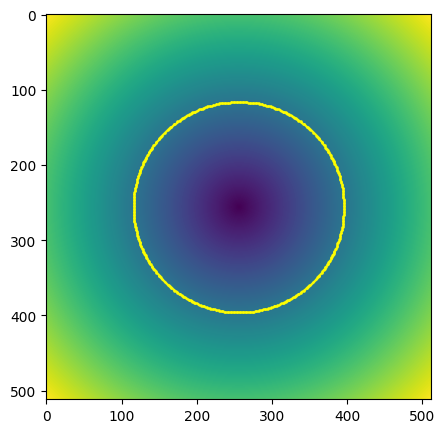

In [4]:
fig, ax = plt.subplots(figsize=(5,5))

circle = np.where((fftshift(k_norm) >= ring_radius-(dk/2)) & (fftshift(k_norm) < ring_radius+(dk/2)))

ax.imshow(k_distances)
ax.scatter(circle[0], circle[1], s=0.5, color="yellow")

## Radial Distribution Function (RDF)

In [5]:
import pathlib
import matplotlib.pyplot as plt


In [32]:
PROJECT_PATH = pathlib.Path().cwd().parents[0]
# TXT_PATH = "data/reference data/hyperuniformity_analysis/hyperuniform_point_ordering.txt"
TXT_PATH = "data/reference data/hyperuniformity_analysis/crystal_point_ordering"

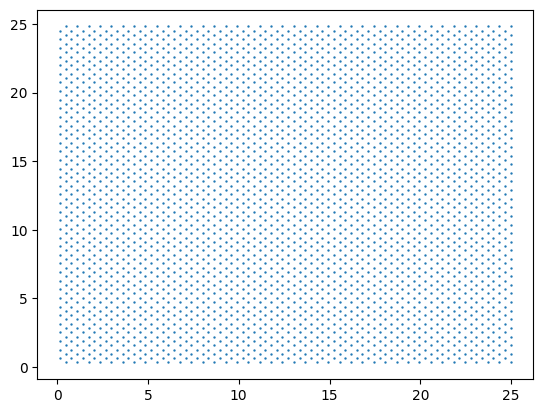

In [46]:
with open(PROJECT_PATH.joinpath(TXT_PATH)) as txt_file:
    point_config = np.loadtxt(txt_file)

L = int(len(point_config)/2)

# point_config =np.sort(point_config)

plt.scatter(point_config[:,0], point_config[:,1], s=0.5)
# plt.scatter(point_config[L,0], point_config[L,1], s=1)

# point_config = np.sqrt(point_config[:,0]**2 + point_config[:,1]**2)


array([[1, 4],
       [5, 7],
       [3, 8],
       [2, 9],
       [3, 5],
       [7, 4],
       [6, 4]])

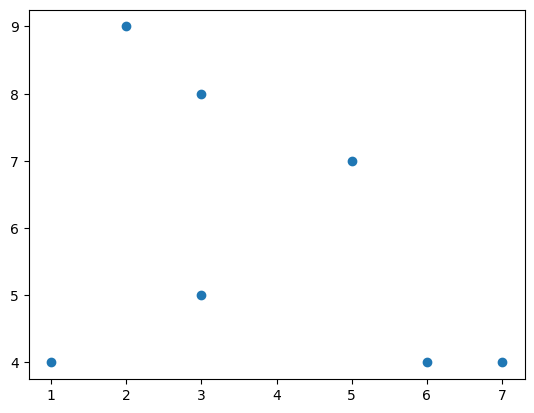

In [15]:
point_config = np.array([[1,4], [5,7], [3,8], [2,9], [3,5], [7,4], [6,4]])

plt.scatter(point_config[:,0], point_config[:,1])

point_config

## Structure Factor $\small{S(k)}$

In [100]:
from pathlib import Path
from re import search

for path in iteration_extrema_paths:
    key = path.stem[:search(r"\d", path.stem).start()-1]
    extrema[key] = np.load(path)

NameError: name 'iteration_extrema_paths' is not defined

In [34]:
from numba import jit

@jit
def density_fourier(kx: np.ndarray, ky: np.ndarray, extrema: np.ndarray) -> np.ndarray:
    '''
    Placeholder
    '''

    density = np.zeros((len(kx), len(kx)), dtype=np.complex64)

    for i in range(len(kx)):
        for j in range(len(kx)):
            # if kx[i,j] == 0 or ky[i,j] == 0:
            #     density[i,j] = 0
            # else:  
            density[i,j] = np.sum( np.exp( -1j*( kx[i,j]*extrema[:,0] + ky[i,j]*extrema[:,1] )) )

    return density, len(extrema[:,0])


def density_fourier_optimized(kx: np.ndarray, ky: np.ndarray, extrema: np.ndarray) -> np.ndarray:
    '''
    Placeholder
    '''

    density = np.zeros((len(kx), len(kx)), dtype=np.complex64)

    exp = np.exp(-1j * (kx[:, :, None] * extrema[:, 0] + ky[:, :, None] * extrema[:, 1]))
    np.add.reduce(exp, axis=2, out=density)
    
    return density, len(extrema)

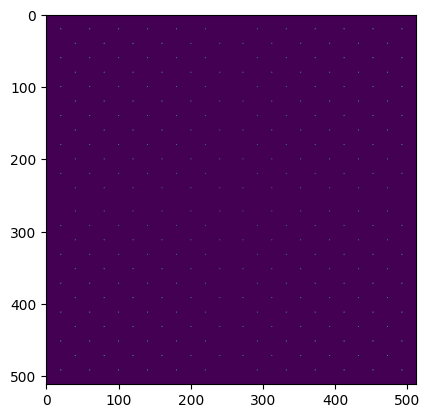

In [47]:
# point_config = np.load(PROJECT_PATH.joinpath("data/extrema_search/arrays/snapshots/extrema/all_extrema_00911000.npy"))

density, N = density_fourier(kx=kx, ky=ky, extrema=point_config)
# density, N = density_fourier_optimized(kx=kx, ky=ky, extrema=point_config)


structure_factor = np.absolute(density)
structure_factor = structure_factor**2/N

# plt.imshow(fftshift(structure_factor))
plt.imshow(structure_factor)

In [44]:
def radial_profile(kx: np.ndarray, ky: np.ndarray, structure_factor: np.ndarray) -> np.ndarray:
    '''
    Placeholder
    '''

    k_norm = np.sqrt(kx**2 + ky**2)
    dk = abs(k_norm[0,2] - k_norm[0,1])
    k_mods = kx[0,:][kx[0,:] > 0][:-1]

    radial_profile = []
    for r_k in k_mods:
        index = np.where((k_norm >= r_k-(dk/2)) & (k_norm < r_k+(dk/2)))

        k_sum = np.sum(structure_factor[index])
        k_normalized = k_sum/(len(index[0]))

        radial_profile.append(k_normalized)
        
    return np.array(radial_profile)

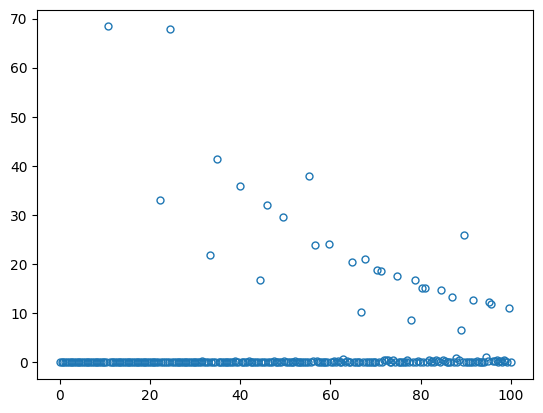

In [43]:
radial = radial_profile(kx, ky, structure_factor)

plt.plot(np.linspace(0,100, num=len(radial)), radial, "o", markersize=5, mfc="none")


[None, None, (0.01, 1), (1e-05, 1)]

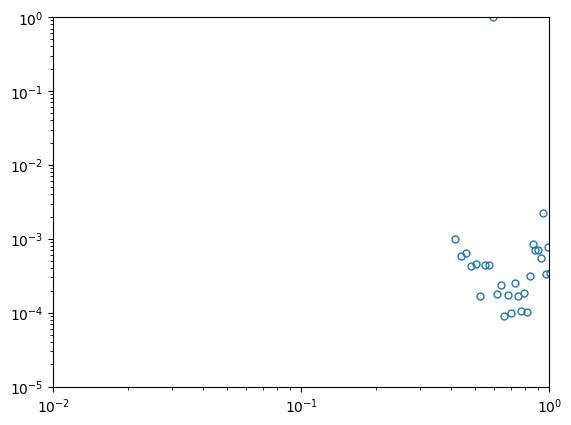

In [42]:
fig, ax = plt.subplots()
# index = np.where(np.linspace(0,100, num=len(radial))/18 == 1)
ax.plot(np.linspace(0,100, num=len(radial))/18, radial/np.max(radial), "o", markersize=5, mfc="none")
ax.set(xscale="log", yscale="log", xlim=[1e-2,1], ylim= [1e-5,1])



In [35]:
a = np.array([[1, 2], [3,4]])
a[np.newaxis,:,:].shape

(1, 2, 2)

In [43]:
b = np.array([1, 2, 3, 4, 5, 6])
b

array([1, 2, 3, 4, 5, 6])

In [50]:
np.add(kx[np.newaxis,:,:]*point_config[:,0][:, np.newaxis, np.newaxis], ky[np.newaxis,:,:]*point_config[:,1][:, np.newaxis, np.newaxis], axis=2)


TypeError: add() got an unexpected keyword argument 'axis'

In [25]:
def density_fourier(kx: np.ndarray, ky: np.ndarray, extrema: np.ndarray) -> np.ndarray:
    '''
    Placeholder
    '''
    
    density = np.sum(np.exp(-1j * (kx[:, None] * extrema[:, 0] + ky[None, :] * extrema[:, 1])), axis=2)

    return density, len(extrema[:,0])

In [26]:
density, N = density_fourier(kx=kx, ky=ky, extrema=point_config)

structure_factor = np.absolute(density)
structure_factor = structure_factor**2/N

plt.imshow(fftshift(structure_factor))

ValueError: operands could not be broadcast together with shapes (512,1,512) (7948,) 